# Violin Plots 101: : Visualizing Distributions and Probability Densities

* [1.0 Cars Fuel consumption dataset](#1.0-Cars-Fuel-consumption-dataset)
* [2.0 How to scale violin plots for comparisons?](#2.0-How-to-scale-violin-plots-for-comparisons?)

In [100]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# import warnings
# warnings.filterwarnings("ignore")

**Violin plots** shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

##  1.0 Cars Fuel consumption dataset

The [mtcars dataset](#https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

In [101]:
cars = pd.read_csv(os.path.join(os.getcwd(), 'input', 'mtcars.csv'))
cars.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 2.0 How to scale violin plots for comparisons?

Instead of starting with the basics first, I wanted to point out an important detail that greatly affects the plots' shapes and is often overlooked during EDA. 

That is how we choose to scale the individual KDE curves. With violin plots, we do not have a separate axis to map the actual density curves. What I mean by that is that we have the categorical variable on the x-axis and the quantitative variable on the y-axis. 

Each violin is just a reflected density plot, and there is no other axis where to plot the density values. Their heights are relative to each other, and we are choosing how to relate them:

* **Equal Areas:** Each violin will have the same area of 1.0 satisfying the definition of a PDF.
* **Equal Widths:** Each violin will have the same  maximum width. Good for comparing shape.
* **Count:** The width of the violins will be scaled by the number of observations in that bin.

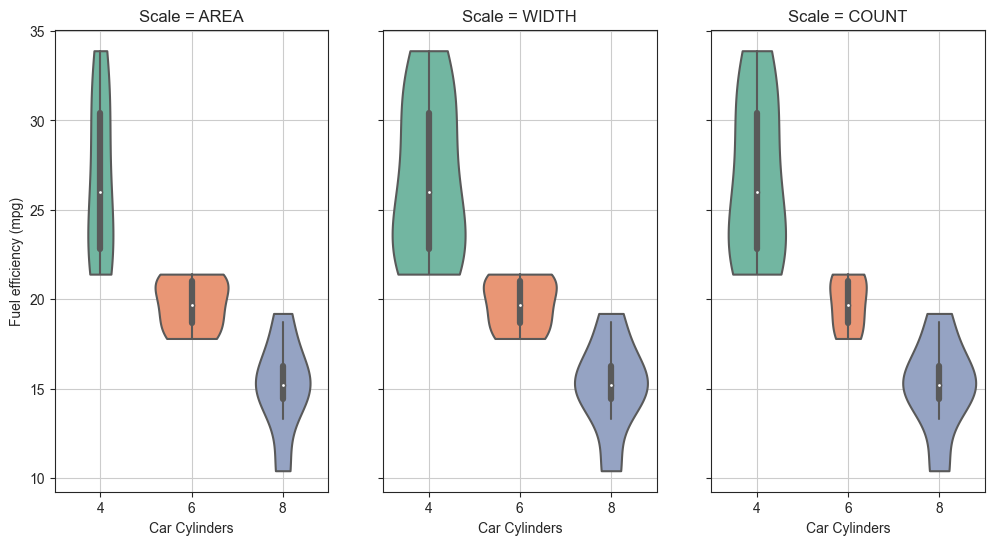

In [102]:
sns.set_style("ticks")

def plot_violin(scale, ax):
    ax = sns.violinplot(data = cars, x = "cyl", y = 'mpg', 
                        palette = 'Set2', ax = ax, cut=0, scale = scale)
    ax.set_ylabel('')
    ax.set_xlabel('Car Cylinders')
    ax.set_title('Scale = ' + scale.upper())
    ax.grid()
    return ax

fig, ax = plt.subplots(1, 3, figsize = (12,6), sharey = True)   
for ax_i, scale in zip(ax.flatten(), ['area', 'width', 'count']):
    plot_violin(scale, ax_i,)

ax[0].set_ylabel('Fuel efficiency (mpg)');

## 3.0 Back to Basics

### 3.1 Data: Perceptions of Probability and Numbers

The raw data comes from responses to the following question: 

*What* ***probability or number*** *would you assign to the phrase* ***phrase*** *?*

In [126]:
df = pd.read_csv(os.path.join(os.getcwd(), 'input', 'people_perception.csv'))
df = pd.melt(df, var_name='phrase', value_name='probability')
df.sample(5).reset_index(drop = True)

,phrase,probability
0,We Believe,60.0
1,About Even,50.0
2,Almost No Chance,5.0
3,We Doubt,15.0
4,About Even,50.0


Get subset of phrases and removing outliers

In [133]:
columns_subset = ['Almost Certainly', 'Highly Likely', 'Probable', 'Likely','Very Good Chance', 
                 'We Believe',  'About Even', 'Unlikely', 'Probably Not']
df = df.loc[df['phrase'].isin(columns_subset)]

#  Upon inspection there was a clear outlier for 'Highly Likely'
idxmin = df.loc[df['phrase'] == 'Highly Likely', 'probability'].idxmin()
df.drop(idxmin, axis = 0, inplace = True)

#  Upon inspection there was a clear outlier for 'Probably Not' = 100 
idxmax = df.loc[df['phrase'] == 'Probably Not', 'probability'].idxmax()
df.drop(idxmax, axis = 0, inplace = True)

order = list(df.groupby('phrase').mean().sort_values(by='probability', ascending = False).index)

### 3.1 Basic violin plot

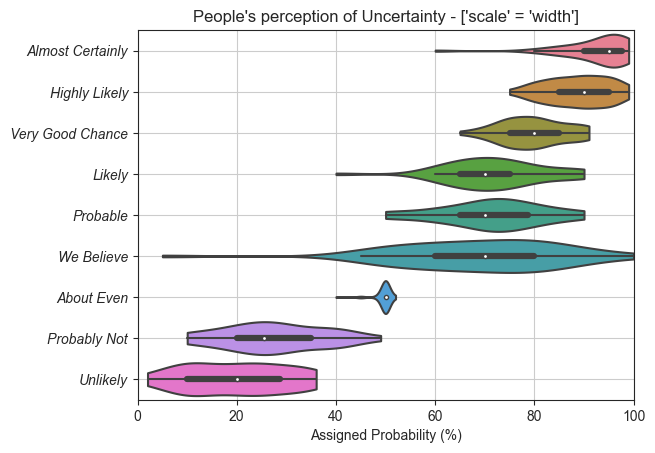

In [168]:
sns.set_style("ticks")
fig, ax = plt.subplots()   
ax = sns.violinplot(df, x = 'probability', y = 'phrase', cut = 0. , inner = 'box', 
                    scale = 'width', ax= ax, order = order, palette = sns.color_palette("husl", 9),
                    alpha = 0.5)
ax.set_ylabel('')
ax.set_yticklabels(labels = ax.get_yticklabels(), style='italic', fontfamily = 'Arial')
ax.set_title("People's perception of Uncertainty - ['scale' = 'width']")
ax.set_xlabel('Assigned Probability (%)')
ax.grid()
ax.set_xlim(0,100)
fig.savefig('hola.svg', format='svg', dpi=1200, bbox_inches="tight")

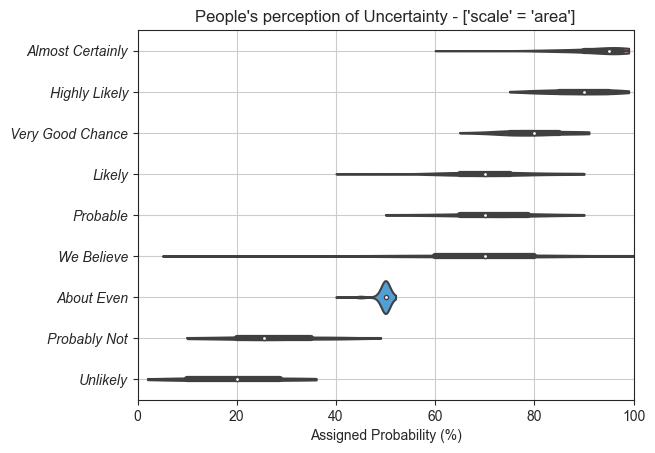

In [167]:
sns.set_style("ticks")
fig, ax = plt.subplots()   
ax = sns.violinplot(df, x = 'probability', y = 'phrase', cut = 0. , inner = 'box', 
                    scale = 'area', ax= ax, order = order, palette = sns.color_palette("husl", 9),
                    alpha = 0.5)
ax.set_ylabel('')
ax.set_yticklabels(labels = ax.get_yticklabels(), style='italic', fontfamily = 'Arial')
ax.set_title("People's perception of Uncertainty - ['scale' = 'area']")
ax.set_xlabel('Assigned Probability (%)')


ax.grid()
ax.set_xlim(0,100)
fig.savefig('hola.svg', format='svg', dpi=1200, bbox_inches="tight")

In [ ]:
sns.set_style("ticks", {"axes.facecolor": ".9"})
fig, ax = plt.subplots()   
ax = sns.violinplot(df, x = 'probability', y = 'phrase', cut = 0. , inner = 'box', 
                    scale = 'area', ax= ax, order = order, palette = sns.color_palette("husl", 9),
                    alpha = 0.8)
ax.set_ylabel('')
ax.set_xlabel('Assigned Probability (%)')
ax.grid()
ax.set_xlim(0,100)

## Ridgeline plots